# Smooth Pursuit

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [14, 8]

## Load study

In [43]:
from bsp.core import load_study

study = load_study("data/prueba2.bsp")

## Print Available Tests

In [44]:
for test in study:
    print(test)

HorizontalCalibration at 30°
HorizontalPursuit at 30°
HorizontalCalibration at 30°


## Access to Specific Test

In [45]:
pursuit = study[1]

pursuit

## Get test channels

In [59]:
stimuli = pursuit.hor_stimuli
horizontal = pursuit.hor_channel
vertical = pursuit.ver_channel

time = np.arange(len(stimuli))

print(time)
print(stimuli.min(), stimuli.max())
print(horizontal)
print(vertical)

[    0     1     2 ... 39997 39998 39999]
-24.575354 -24.042
[  0.         0.         0.       ... -31.37973  -30.432007 -30.432007]
[-29.147293  -29.621155  -29.621155  ...  -2.611145   -1.6634216
  -1.6634216]


## Plot Channels

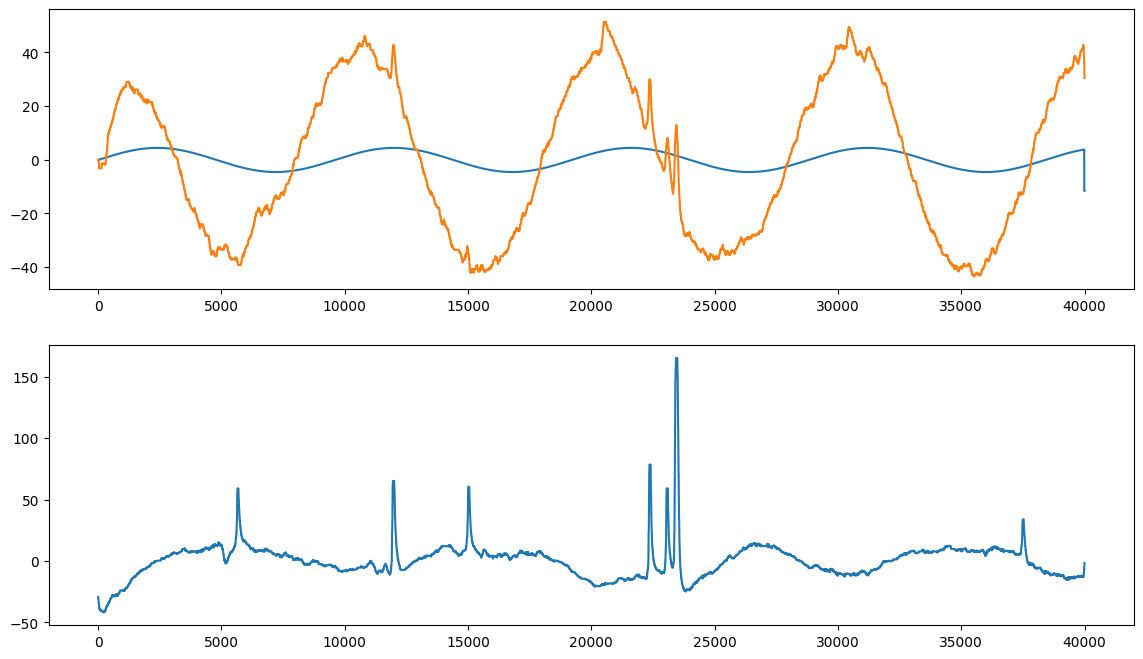

In [56]:
amplitude = horizontal.max() - horizontal.min()

plt.plot(time, (stimuli - stimuli.mean())*30)
plt.plot(time, horizontal * -1)

plt.subplot(212)
plt.plot(time, vertical)



plt.savefig("smooth_pursuit.png")

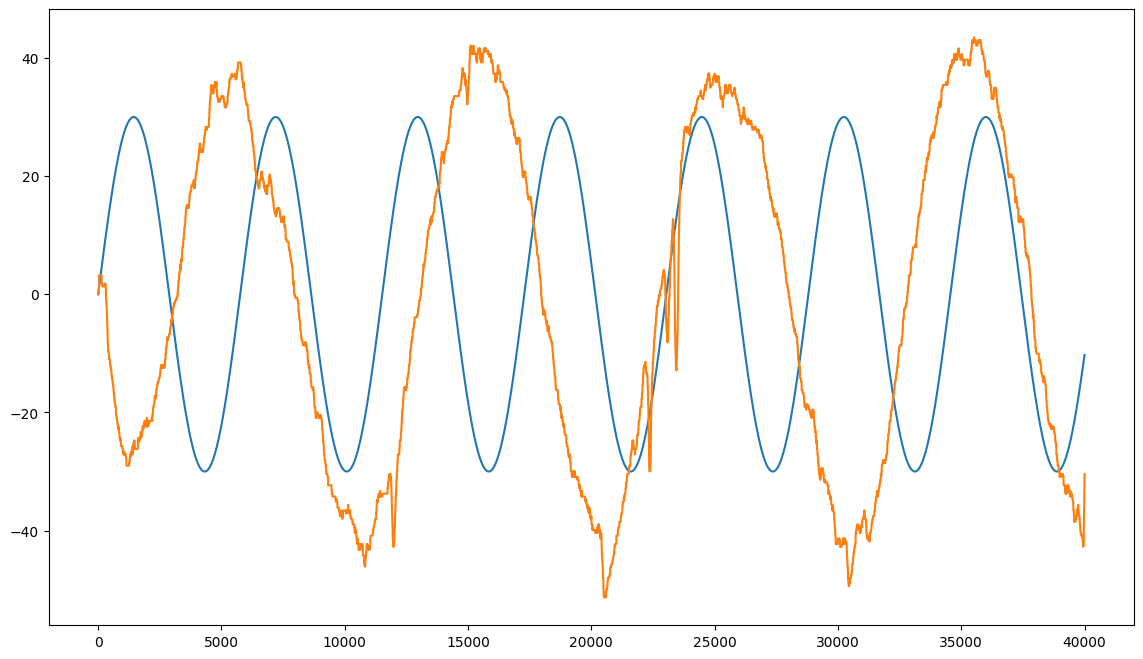

In [57]:
def pursuit_stimuli(
    length: int,
    speed: float = 100,
    angle: int = 60,
) -> np.ndarray:
    """Generate a pursuit stimulus

    Args:
        length (int): Length of the stimulus
        speed (float, optional): Speed of the stimulus in °/s. Defaults to 2.0.
        angle (int, optional): Angle of the stimulus. Defaults to 60.

    Returns:
        ndarray: Pursuit stimulus
    """
    num_cycles = speed / 360
    x = np.linspace(0, num_cycles * 2 * np.pi, length)

    return np.sin(x) * (angle // 2)

y = pursuit_stimuli(len(time), speed=2500)

plt.plot(time, y)
plt.plot(time, horizontal)

In [23]:
y

array([  0.        ,   0.03272574,   0.06545143, ..., -10.32208411,
       -10.29135033, -10.2606043 ])